In [264]:
import pandas as pd
import numpy as np

import os

import pypianoroll

import pygame

from matplotlib import pyplot as plt

In [15]:
# Directories:

data_dir = "/Users/chrisolen/Documents/uchicago_courses/deep_learning_and_image_recognition/audio_generation/data/"
scripts_dir = "/Users/chrisolen/Documents/uchicago_courses/deep_learning_and_image_recognition/audio_generation/NADE_music_generation/"

# Read In Track Metadata

In [16]:
# Read in track metadata:

track_metadata = pd.read_csv(scripts_dir+"data_cleaning_scripts/track_metadata.csv",
                            index_col='Unnamed: 0')

In [17]:
track_metadata.head()

,track_id,mb_id,artist,song_title,sp_track_id,sp_artist_id,time_sig,tempo,energy,loudness,speechiness,acousticness,instrumentalness,genre
0,TRBQUUS12903CB2580,7b28fb58-882b-4907-856e-ef327b624b11,+ / - {Plus/Minus},Flight Data Recorder,5aXSB4ywBWcPVBuOqxJAsZ,4j4NbPKY5EnsEUhdNICINb,3.0,108.021,0.584,-9.032,0.0270,0.00184,0.15500,[]
1,TRRXTJI12903D01048,6bd4eaa7-aa1c-4138-a392-41693229c7fc,+39,My Relax,2j7kfbjTPqpaYHide0hFxi,5Cicr7PrzTNv4bXiZntlex,4.0,119.997,0.553,-7.488,0.2160,0.00514,0.86900,[]
2,TRMKKFV12903CB7EA4,NaN,...arrived at ten,Flake,1T3zWGYGHIAX36IHYHL9Ar,49myFlNbBmL4X25pekwLqR,4.0,106.003,0.437,-12.814,0.0261,0.91300,0.88100,[]
3,TRNVJXQ128F14AFD63,2fc659fa-293f-4288-bff5-29447f31f628,1. Futurologischer Congress,Atem,6bsV04oYvnEEh2tmMzbuE3,6MD8yUEX0V8XJR2Xrwz0HO,4.0,136.250,0.883,-7.470,0.0513,0.03660,0.00704,['neue deutsche welle']
4,TRLIEDO12903CA41B4,f37c537b-3557-4031-bfd6-ab63ced32854,10 CC,The Things We Do For Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['nan']


In [18]:
track_metadata.shape

(31032, 14)

# Read in Midi Files

In [408]:
# Locate desired track_id from metadata:

track_id = track_metadata.iloc[1000,0]

In [409]:
# Find the corresponding midi file:

midi_id = os.listdir(data_dir+"midi_files/"+ track_id)[0]

In [410]:
# Load in the full path:

mid = pypianoroll.Multitrack(data_dir+"midi_files/"+ track_id + "/" + midi_id)

In [411]:
# Is it binarized?

mid.is_binarized()

False

In [412]:
# Binarize:

mid.binarize()

In [413]:
# Store binarized int pianoroll as separate object:

roll = mid.get_stacked_pianoroll().astype(int)

In [414]:
# Multitrack object metadata:

instrumentation = [mid.tracks[i].program for i in range(len(mid.tracks))]

unique, counts = np.unique(mid.tempo, return_counts=True)
tempo = dict(zip(unique, counts))

beat_res = mid.beat_resolution # number of time steps per beat

active_length = mid.get_active_length() # number of time steps where there's some activity

pitch_range = mid.get_active_pitch_range()

In [415]:
# Pianoroll object metadata (for one voice):

empty_beat_rate = pypianoroll.metrics.empty_beat_rate(roll[:,:,0], beat_res) # Ratio of empty beats to the total number of beats

num_pitches_used = pypianoroll.metrics.n_pitches_used(roll[:,:,0])

In [421]:
# Write multitrack pianroll to a MIDI file:

mid.write(scripts_dir + "modeling_scripts/"+"test_midi")


# Playing Midi File in Python

In [88]:
pygame.mixer.init()
pygame.mixer.music.load(data_dir+"midi_files/"+ track_id + "/" + midi_id)
pygame.mixer.music.play()

In [90]:
pygame.mixer.music.stop()

# Plotting

In [113]:
help(plot_pianoroll)

Help on function plot_pianoroll in module pypianoroll.plot:

plot_pianoroll(ax, pianoroll, is_drum=False, beat_resolution=None, downbeats=None, preset='default', cmap='Blues', xtick='auto', ytick='octave', xticklabel=True, yticklabel='auto', tick_loc=None, tick_direction='in', label='both', grid='both', grid_linestyle=':', grid_linewidth=0.5)
    Plot a pianoroll given as a numpy array.
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes object
        A :class:`matplotlib.axes.Axes` object where the pianoroll will be
        plotted on.
    pianoroll : np.ndarray
        A pianoroll to be plotted. The values should be in [0, 1] when data
        type is float, and in [0, 127] when data type is integer.
    
        - For a 2D array, shape=(num_time_step, num_pitch).
        - For a 3D array, shape=(num_time_step, num_pitch, num_channel),
          where channels can be either RGB or RGBA.
    
    is_drum : bool
        A boolean number that indicates whether it is a perc

ValueError: The length of the second axis of `pianoroll` must be 128.

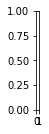

In [118]:
fig = plt.figure()
ax = fig.add_subplot(2, 128, 1) 

plot_pianoroll(ax=ax,pianoroll=mid.get_stacked_pianoroll()[0])